In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import rubin_sim.maf.db as db
import rubin_sim.maf.utils as utils
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers
import rubin_sim.maf.stackers as stackers
import rubin_sim.maf.metricBundles as metricBundles
import rubin_sim.maf.plots as plots

import os

In [2]:
def just_pass(input):
    return input

In [3]:
ra = 20
dec = -40

f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
        'i': 'cyan', 'z': 'orange', 'y': 'red'}

slicePoint={}
slicePoint['ra'] = ra
slicePoint['dec'] = np.radians(dec)
slm = metrics.SeasonLengthMetric(reduceFunc=just_pass)

Querying table None with no constraint for columns ['observationStartMJD', 'fieldRA', 'fiveSigmaDepth', 'fieldDec', 'rotSkyPos', 'visitExposureTime', 'night', 'filter'].
Found 2086980 visits
Running:  ['baseline_v2_0_Pass_filter_observationStartMJD_fiveSigmaDepth_night_visitExposureTime_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


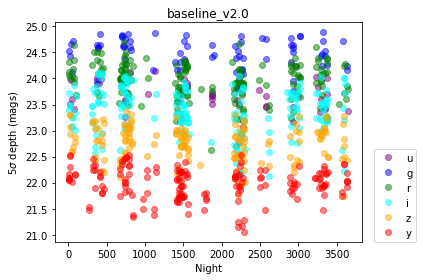

In [4]:
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

run = 'baseline_v2.0_10yrs.db'
name = run.replace('_10yrs.db', '')

bundleList = []
sql = ''
metric = metrics.PassMetric(['filter', 'observationStartMJD', 'fiveSigmaDepth',
                             'night','visitExposureTime'])
slicer = slicers.UserPointsSlicer(ra=ra, dec=dec)
summaryStats = []
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                             plotDict=plotDict,
                                             summaryMetrics=summaryStats,
                                             runName=name))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, run, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
#bg.plotAll(closefigs=False)

mv = bundleList[0].metricValues[0]
plt.figure()
for fn in f2c:
    in_filt = np.where(mv['filter'] == fn)[0]
    plt.plot(mv['night'][in_filt],
             mv['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn], label=fn, alpha=0.5)
plt.xlabel('Night')
plt.ylabel(r'5$\sigma$ depth (mags)')
plt.legend(loc=(1.04,0))
#plt.xlim([1340, 1560])
plt.title(name)
plt.tight_layout()


In [5]:
seasons = slm.run(mv, slicePoint)
print('seaons=', seasons)
print('median', np.median(seasons))

seaons= [ 92.70610364 202.67830272 288.98729731 173.81035368 182.74527176
 178.68279546 161.69127139 128.89447868 163.71350989 308.0532306
  76.95448663]
median 173.81035368019366


Text(0.5, 1.0, 'baseline_v2.0')

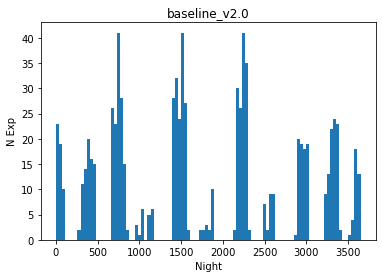

In [6]:
ack = plt.hist(mv['night'], bins=100)
plt.xlabel('Night')
plt.ylabel('N Exp')
plt.title(name)

Querying table None with no constraint for columns ['observationStartMJD', 'fieldRA', 'fiveSigmaDepth', 'fieldDec', 'rotSkyPos', 'visitExposureTime', 'night', 'filter'].
Found 1978164 visits
Running:  ['presto_gap2_5_mix_v2_0_Pass_filter_observationStartMJD_fiveSigmaDepth_night_visitExposureTime_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


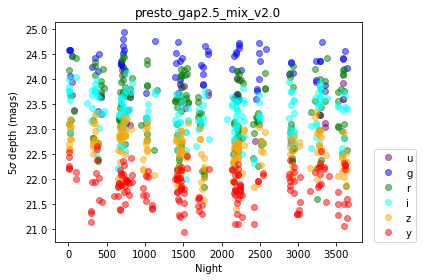

In [7]:
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

run = '../presto/presto_gap2.5_mix_v2.0_10yrs.db'
name = os.path.basename(run).replace('_10yrs.db', '')

bundleList = []
sql = ''
metric = metrics.PassMetric(['filter', 'observationStartMJD', 'fiveSigmaDepth', 'night', 'visitExposureTime'])
slicer = slicers.UserPointsSlicer(ra=ra, dec=dec)
summaryStats = []
plotDict = {}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql,
                                             plotDict=plotDict,
                                             summaryMetrics=summaryStats,
                                             runName=name))
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, run, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
#bg.plotAll(closefigs=False)

mv = bundleList[0].metricValues[0]
plt.figure()
for fn in f2c:
    in_filt = np.where(mv['filter'] == fn)[0]
    plt.plot(mv['night'][in_filt],
             mv['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn], label=fn, alpha=0.5)
plt.xlabel('Night')
plt.ylabel(r'5$\sigma$ depth (mags)')
plt.legend(loc=(1.04,0))
#plt.xlim([1340, 1560])
plt.title(name)
plt.tight_layout()

Text(0.5, 1.0, 'presto_gap2.5_mix_v2.0')

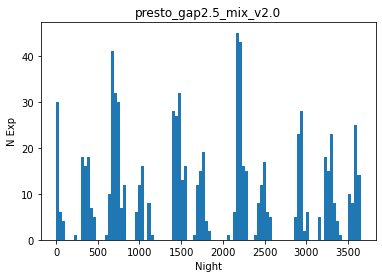

In [8]:
ack = plt.hist(mv['night'], bins=100)
plt.xlabel('Night')
plt.ylabel('N Exp')
plt.title(name)

In [9]:
seasons = slm.run(mv, slicePoint)
print('seaons=', seasons)
print('median', np.median(seasons))

seaons= [ 97.95033871 344.98586135 322.09173242 186.87704613 304.09145648
 121.95529057 354.03266298 146.67212841 147.82880945 362.02259408
  92.67345728]
median 186.87704613133246
